In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from collections import Counter


In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [5]:
# load the dataset
df = pd.read_csv("Datagroup.csv")
test = pd.read_csv("testing.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

df_Original = df.copy()

In [8]:
df_Original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# show the shape of the dataset i.e. no of rows, no of columns
df_Original.shape

(513, 13)

In [10]:
# check for missing values
df_Original.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,False,False,False,False,False,False,False,False,False,False,False,False,False
509,False,False,False,False,False,False,False,False,False,False,False,False,False
510,False,False,False,False,False,False,False,False,False,False,False,False,False
511,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df_Original.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

## Treating Missing Values

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [12]:
# replace missing values with the mode on categorical variables
df_Original['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df_Original['Married'].fillna(df['Married'].mode()[0], inplace=True)
df_Original['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df_Original['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df_Original['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [13]:
df_Original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df_Original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,513.000000
mean,5497.013645,1537.364366,144.739394,343.118236,0.859649
std,6486.147388,2144.079038,83.200278,63.375911,0.347690
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1210.000000,127.000000,360.000000,1.000000
75%,5746.000000,2283.000000,163.000000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


we want to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable, so that we can see whether we can use mean/mode/median

In [15]:
df_Original['Loan_Amount_Term'].value_counts()

360.0    426
180.0     35
300.0     13
480.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [16]:
df_Original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [17]:
# replace missing value with the mode
df_Original['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [18]:
df_Original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


Now we want to see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we seethat loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [19]:
df_Original['LoanAmount'].value_counts()

120.0    19
100.0    13
160.0    12
110.0    12
113.0    10
         ..
59.0      1
191.0     1
35.0      1
166.0     1
250.0     1
Name: LoanAmount, Length: 183, dtype: int64

In [20]:
# replace missing value with the median
df_Original['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [21]:
df_Original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [22]:
# check whether all the missing values are filled in the dataset
df_Original.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Outlier Treatment

Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Text(0.5, 1.0, 'Our Dataset')

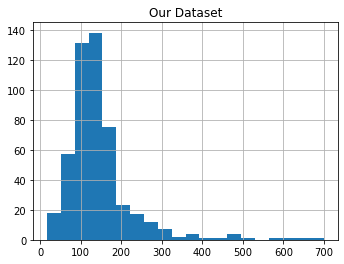

In [23]:
# before log transformation

ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Our Dataset")

In [24]:
# Removing skewness in LoanAmount variable by log transformation
df_Original['LoanAmount'] = np.log(df['LoanAmount'])

Text(0.5, 1.0, 'Our dataset')

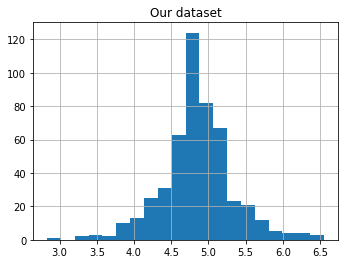

In [25]:
# after log transformation

ax1 = plt.subplot(121)
df_Original['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Our dataset")

In [26]:
df_Original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,513.000000,513.000000
mean,5497.013645,1537.364366,4.853845,343.578947,0.859649
std,6486.147388,2144.079038,0.483090,62.564046,0.347690
min,150.000000,0.000000,2.833213,12.000000,0.000000
25%,2876.000000,0.000000,4.605170,360.000000,1.000000
50%,3846.000000,1210.000000,4.844187,360.000000,1.000000
75%,5746.000000,2283.000000,5.093731,360.000000,1.000000
max,81000.000000,20000.000000,6.551080,480.000000,1.000000


In [27]:
df_Original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,513.000000,513.000000
mean,5497.013645,1537.364366,4.853845,343.578947,0.859649
std,6486.147388,2144.079038,0.483090,62.564046,0.347690
min,150.000000,0.000000,2.833213,12.000000,0.000000
25%,2876.000000,0.000000,4.605170,360.000000,1.000000
50%,3846.000000,1210.000000,4.844187,360.000000,1.000000
75%,5746.000000,2283.000000,5.093731,360.000000,1.000000
max,81000.000000,20000.000000,6.551080,480.000000,1.000000


In [28]:
# Outlier treatment 
df_Original['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df_Original['LoanAmount'] = np.log(df['LoanAmount'])
df_Original['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])

## Treating outlires

In [29]:
#treating outliers as if they are missing value
#impute outliers with mean
def impute_outliers_IQR(df_Original):

   q1=df_Original.quantile(0.25)

   q3=df_Original.quantile(0.75)

   IQR=q3-q1

   upper = df_Original[~(df_Original>(q3+1.5*IQR))].max()

   lower = df_Original[~(df_Original<(q1-1.5*IQR))].min()

   df_Original = np.where(df_Original > upper,

       df_Original.mean(),

       np.where(

           df_Original < lower,

           df_Original.mean(),

           df_Original

           )

       )

   return df_Original

In [30]:
df_Original['CoapplicantIncome'] = impute_outliers_IQR(df_Original['CoapplicantIncome'])
df_Original.describe()['CoapplicantIncome']

count     513.000000
mean     1310.727137
std      1461.499332
min         0.000000
25%         0.000000
50%      1210.000000
75%      2166.000000
max      5701.000000
Name: CoapplicantIncome, dtype: float64

## Describe Function

Describe function helps us to analyse easly the outliers in Dataset

In [31]:
df_Original.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,513.000000,513.000000,495.000000,499.000000,513.000000
mean,8.346797,1310.727137,4.853845,5.806744,0.859649
std,0.654148,1461.499332,0.483090,0.306626,0.347690
min,5.010635,0.000000,2.833213,2.484907,0.000000
25%,7.964156,0.000000,4.605170,5.886104,1.000000
50%,8.254789,1210.000000,4.844187,5.886104,1.000000
75%,8.656259,2166.000000,5.093731,5.886104,1.000000
max,11.302204,5701.000000,6.551080,6.173786,1.000000


In [32]:
# Separting the Variable into Independent and Dependent 
X = df_Original.iloc[:, 1:-1].values
y = df_Original.iloc[:, -1].values

In [33]:
# show the data types for each column of the train set
df_Original.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
df_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             513 non-null    object 
 2   Married            513 non-null    object 
 3   Dependents         513 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      513 non-null    object 
 6   ApplicantIncome    513 non-null    float64
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     513 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(5), object(8)
memory usage: 52.2+ KB


## Descriptive Analysis

We are using linear regression for statistic methotologe of our dataset in order to see the dependent an indepent variables in the dataset, by loking at the variables closer to linear line and also far from it 

In [35]:
# frequency table of a variable will give us the count of each category in that variable
df_Original['Loan_Status'].value_counts()

Y    355
N    158
Name: Loan_Status, dtype: int64

In [36]:
# frequency table of a variable will give us the count of each category in that variable
df_Original['Gender'].value_counts()

Male      419
Female     94
Name: Gender, dtype: int64

In [37]:
# frequency table of a variable will give us the count of each category in that variable
df_Original['Married'].value_counts()

Yes    333
No     180
Name: Married, dtype: int64

In [38]:
# frequency table of a variable will give us the count of each category in that variable
df_Original['Self_Employed'].value_counts()

No     446
Yes     67
Name: Self_Employed, dtype: int64

In [39]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
df_Original['Self_Employed'].value_counts(normalize=True)

No     0.869396
Yes    0.130604
Name: Self_Employed, dtype: float64

This descriptive Analysis shows that 445(arround 87%) people are unemployed out of 513 which mean there are less opportunities for unemployed people toget loan

<AxesSubplot:>

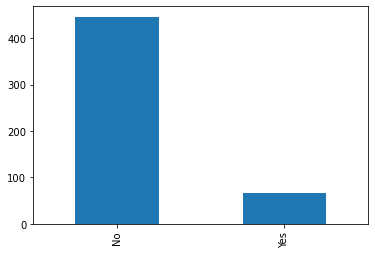

In [40]:
# bar plot to visualize the frequency
df_Original['Self_Employed'].value_counts().plot.bar()

this bar chart shows the loan of 422 (around 69%) people out of 513 was approved. There is no imbalanced classes issue in this dataset, thus accuracy as an evaluation metric should be appropriate. On the other hand, if there are imbalanced or skewed classes, then we might need to use precision and recall as evaluation metrics.

## Independent Variable (Categorical)



There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

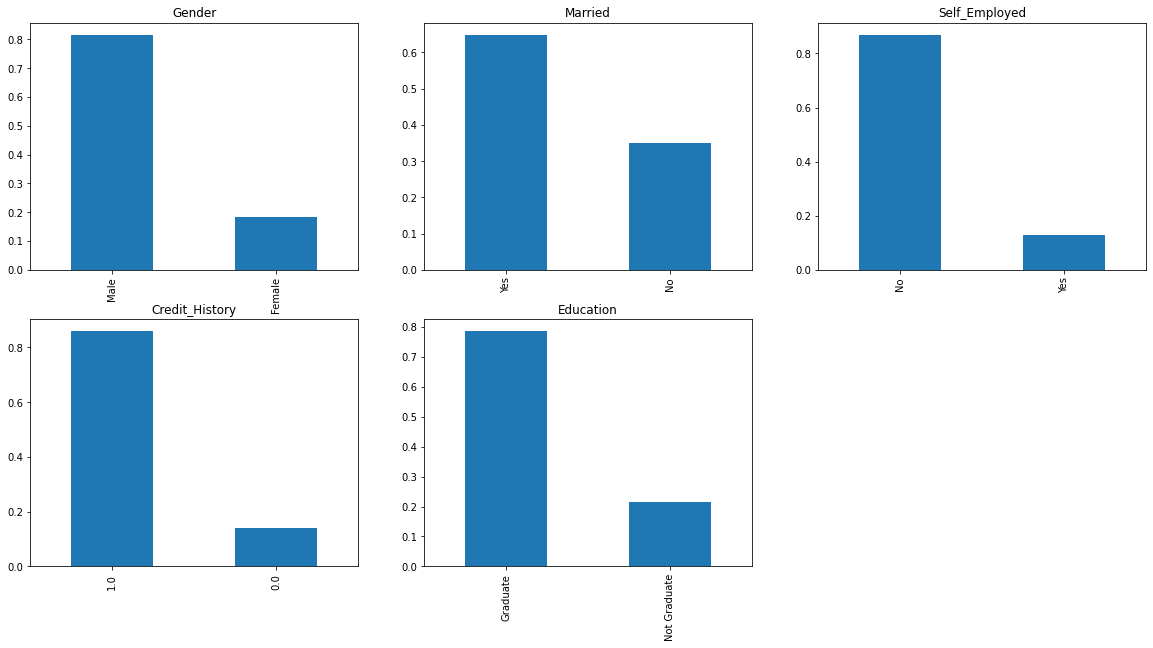

In [41]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df_Original['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df_Original['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df_Original['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df_Original['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df_Original['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

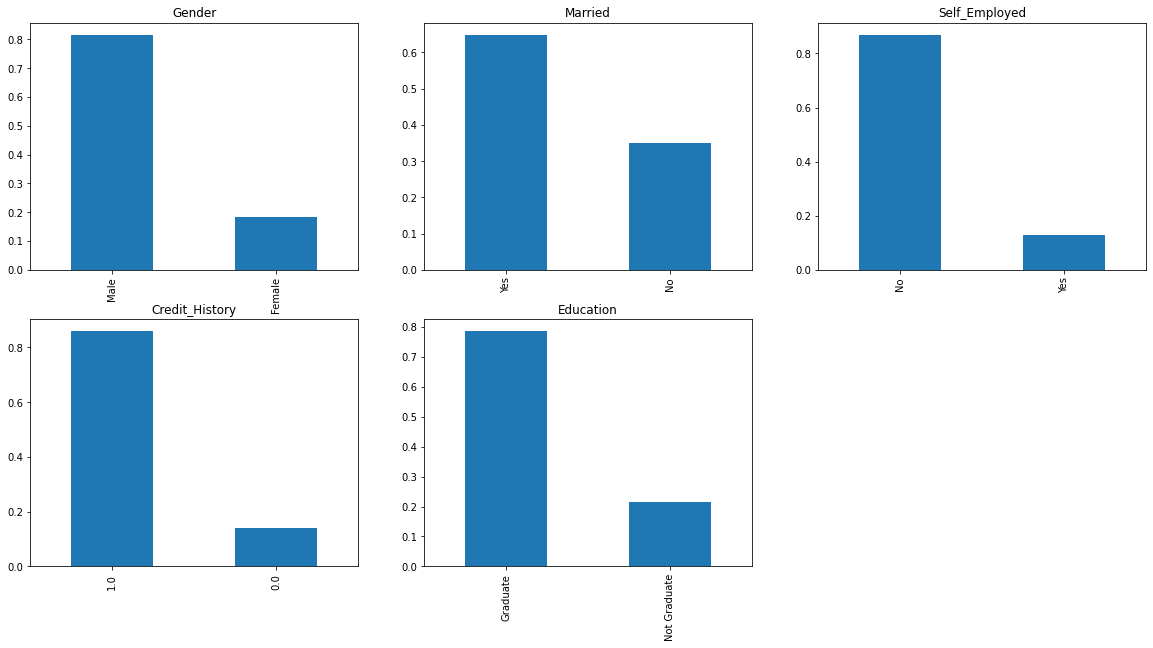

In [42]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
df_Original['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df_Original['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df_Original['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df_Original['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df_Original['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male. Around 65% of the applicants in the dataset are married. Around 15% applicants in the dataset are self employed. Around 85% applicants have credit history (repaid their debts). Around 80% of the applicants are Graduate

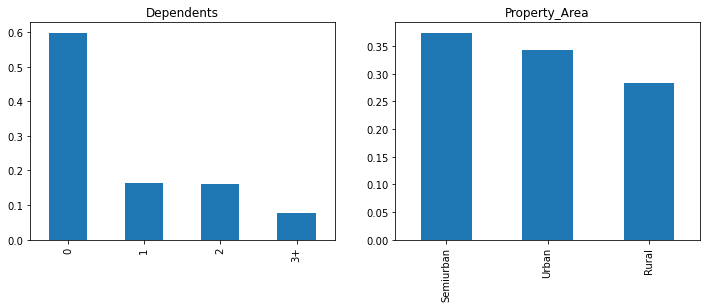

In [43]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
df_Original['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df_Original['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

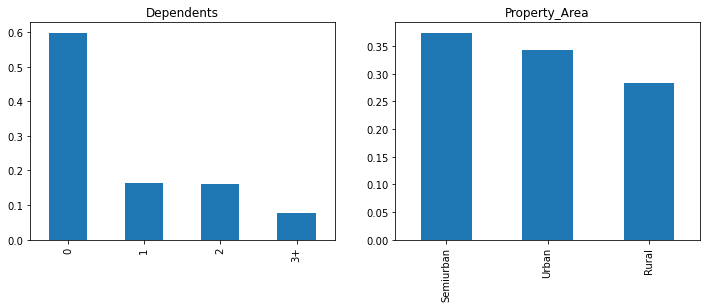

In [44]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
df_Original['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df_Original['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

More than half of the applicants don’t have any dependents.

 Most of the applicants are from Semiurban area.

Text(0.5, 0.98, '')

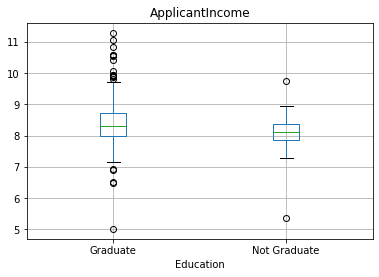

In [45]:
df_Original.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

This graph shows that there are a higher number of graduates with very high income in the dataset

In [46]:
import seaborn as sns

In [47]:
df_Original.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df_Original['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mode()[0], inplace=True)

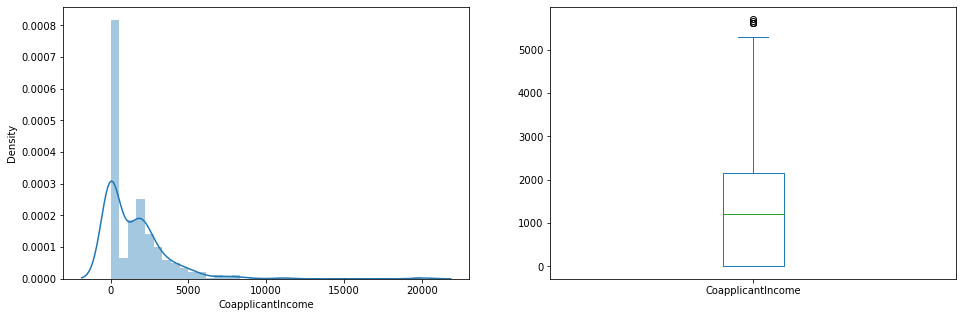

In [49]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df_Original['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [50]:
df_Original['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mode()[0], inplace=True)
df_Original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,NaN,5.886104,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,7.815611,3013.0,5.236442,5.886104,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,9.492658,0.0,3.688879,5.886104,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,8.188133,1287.0,4.605170,5.886104,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,8.710290,2004.0,5.521461,5.886104,1.0,Semiurban,Y


In [51]:
df_Original['CoapplicantIncome'].value_counts()

0.000000       229
1537.364366     14
1666.000000      5
2083.000000      5
2500.000000      3
              ... 
736.000000       1
1964.000000      1
1619.000000      1
1451.000000      1
2035.000000      1
Name: CoapplicantIncome, Length: 232, dtype: int64

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 22. We also see that there no outliers in the coapplicant income and it is  normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable that there are less less or no outlierss too.

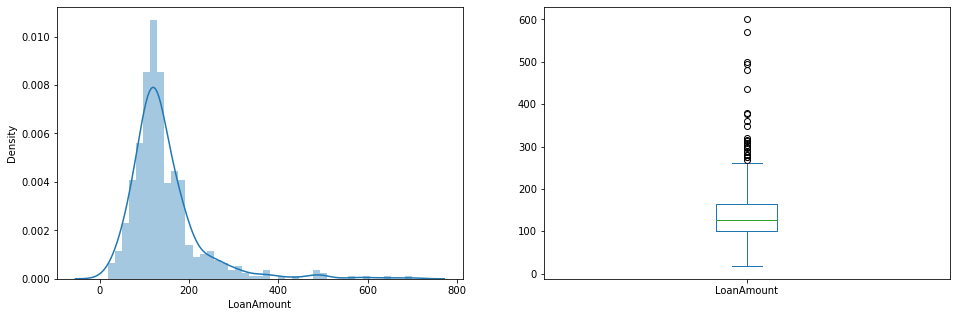

In [52]:
# plt.figure(1)
plt.subplot(121)
df_Original=df.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df_Original['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [53]:
df_Original['CoapplicantIncome'].value_counts()

0.0       180
1666.0      5
2083.0      3
5625.0      3
1717.0      2
         ... 
830.0       1
1041.0      1
1280.0      1
1447.0      1
2035.0      1
Name: CoapplicantIncome, Length: 197, dtype: int64

## Bivariate Analysis


After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status   N    Y
Gender              
Female       27   45
Male         97  231


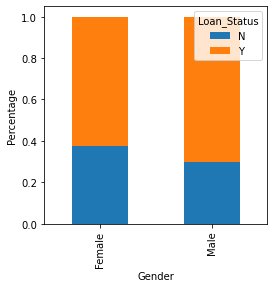

In [54]:
print(pd.crosstab(df_Original['Gender'],df_Original['Loan_Status']))

Gender = pd.crosstab(df['Gender'],df_Original['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

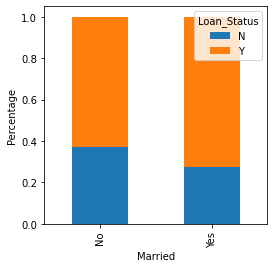

In [55]:
Married = pd.crosstab(df_Original['Married'],df_Original['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             105  242
Yes             19   34


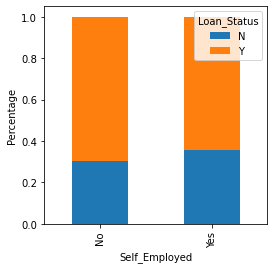

In [56]:
print(pd.crosstab(df_Original['Self_Employed'],df_Original['Loan_Status']))

Self_Employed=pd.crosstab(df_Original['Self_Employed'],df_Original['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status   N    Y
Dependents          
0            73  162
1            26   40
2            14   53
3+           11   21


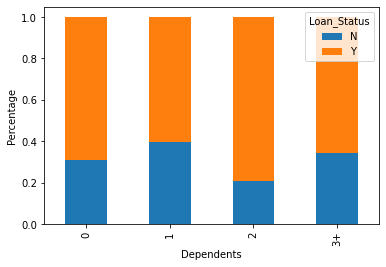

In [57]:
print(pd.crosstab(df_Original['Dependents'],df_Original['Loan_Status']))

Dependents=pd.crosstab(df_Original['Dependents'],df_Original['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             52    6
1.0             72  270


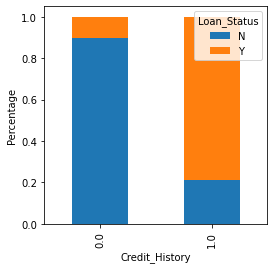

In [58]:
print(pd.crosstab(df_Original['Credit_History'],df_Original['Loan_Status']))

Credit_History=pd.crosstab(df_Original['Credit_History'],df_Original['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          45   67
Semiurban      32  127
Urban          47   82


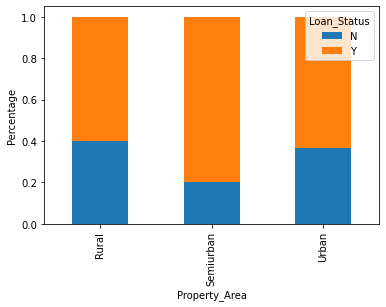

In [59]:
print(pd.crosstab(df_Original['Property_Area'],df_Original['Loan_Status']))

Property_Area=pd.crosstab(df_Original['Property_Area'],df_Original['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar charts above, it can be inferred that:

proportion of male and female applicants is more or less same for both approved and unapproved loans

proportion of married applicants is higher for the approved loans distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status there is nothing significant we can infer from Self_Employed vs Loan_Status plot. proportion of loans getting approved for graduates is higher compared to non-graduates it seems people with credit history as 1 are more likely to get their loans approved proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [60]:
df_Original

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [61]:
# replacing 3+ in Dependents variable with 3 for dataset
df_Original['Dependents'].replace('3+', 3, inplace=True)

In [62]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
df_Original['Loan_Status'].replace('N', 0, inplace=True)
df_Original['Loan_Status'].replace('Y', 1, inplace=True)

In [63]:
# check the dataset
df_Original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, 
excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. 
Heatmaps visualize data through variations in coloring. 
The variables with darker color means their correlation is more

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.103598,0.482598,-0.031233,-0.081926,-0.073335
CoapplicantIncome,-0.103598,1.000000,0.288961,0.007795,-0.030409,-0.009425
LoanAmount,0.482598,0.288961,1.000000,0.024370,-0.071847,-0.123401
Loan_Amount_Term,-0.031233,0.007795,0.024370,1.000000,0.054995,-0.040048
Credit_History,-0.081926,-0.030409,-0.071847,0.054995,1.000000,0.522278
Loan_Status,-0.073335,-0.009425,-0.123401,-0.040048,0.522278,1.000000


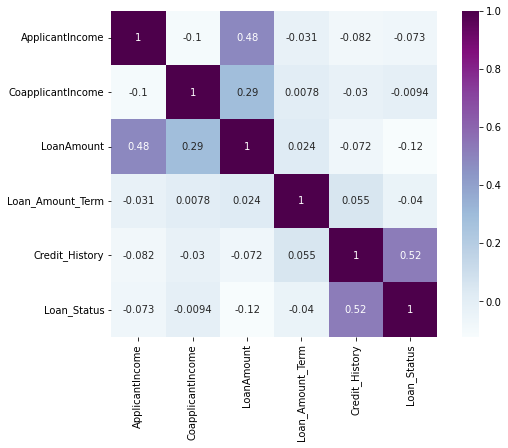

In [64]:
# calculate and visualize correlation matrix
matrix = df_Original.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

## Model Building : Part I

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [65]:
# drop Loan_ID 
df_Original = df_Original.drop('Loan_ID', axis=1)
# drop Loan_ID 
test = test.drop('Loan_ID', axis=1)

In [66]:
# drop "Loan_Status" and assign it to target variable
X = df_Original.drop('Loan_Status', 1)
y = df_Original.Loan_Status

In [67]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
508,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban
509,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban
510,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural
511,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.
We can use pandas get_dummies function to convert categorical variable into dummy/indicator variables, it will only convert "object" type and will not affect numerical type.

In [68]:
# adding dummies to the dataset
X = pd.get_dummies(X)
df_Original = pd.get_dummies(df)

In [69]:
X.shape, df_Original.shape

((400, 20), (513, 535))

In [70]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1


In [71]:
# import library
from sklearn.model_selection import train_test_split

In [72]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)

In [73]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((280, 20), (120, 20), (280,), (120,))

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [74]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [76]:
# make prediction
pred_cv = model.predict(x_cv)

Now we calculate how accurate the predictions are by calculating the accuracy.

In [77]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.7833333333333333

So our predictions are over 78% accurate, i.e. we have identified 78% of the loan status correctly.

Let’s evaluate our model with the confusion matrix.

[[16 22]
 [ 4 78]]


Text(33.0, 0.5, 'True')

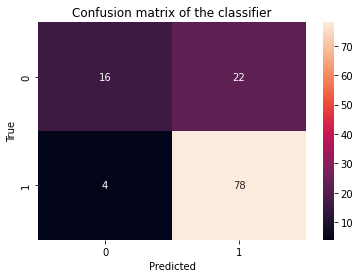

In [78]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

Now we build a text report showing the main classification metrics.

In [79]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.80      0.42      0.55        38
           1       0.78      0.95      0.86        82

    accuracy                           0.78       120
   macro avg       0.79      0.69      0.70       120
weighted avg       0.79      0.78      0.76       120



The performance of our model seems encouraging, with accuracy of 79%, precision of 78% and recall of 95%.

The predictions for our dataset and submit the result.

In [80]:
# make prediction on test set
#test = pd.get_dummies(test)
pred_test = model.predict(X)

In [81]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [82]:
pred_test = model.predict(X)

In [83]:
pred_test = model.predict(X)
df=pd.DataFrame(pred_test)#converting the output to pandas dataframe

In [84]:
import pandas_bokeh

In [85]:
# Embedding plots in Jupyter/Colab Notebook
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [86]:
# for exporting plots as HTML
df_Original2 = pandas_bokeh.output_file("Datagroup.csv")

In [87]:
#define the categorical variable
category = ['Y','N','C']
#set random seed to make the dataset reproducible
np.random.seed(42)
#create a dataset
df_Original2 = pd.DataFrame({
   'Loan_ID': np.arange(0, 15),
   'Gender':np.random.randint(1, 12, 15),
   'Dependents': np.random.uniform(0, 1,15),
   'Self_Employed': np.random.uniform(10, 15, 15),
   'Self_Employed': np.random.randint(0, 20, 15),
   'Loan_Status': np.random.choice(category, 15, p=[0.2, 0.4, 0.4])
})

In [88]:
#set index to id column
df_Original2 =df_Original2.set_index('Loan_ID')

In [89]:
from flask import request, redirect, Flask, send_from_directory, abort, jsonify, render_template
import joblib
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import seaborn as sb
# from sklearn.linear_model import LogisticRegression
import io
import base64


In [90]:

app = Flask(__name__)

In [93]:




def result():
    
    
    ApplicantIncome=0
    CoapplicantIncome= 0
    LoanAmount= 0
    Loan_Amount_Term= 0
    Credit_History= 0
    Self_Employed= 0
    Credit_History= 0
    Loan_Status= 0
    
    Gender_Female = 0
    Gender_Male=0
    Married_No=0
    Married_Yes=0
    Dependents_3=0
    Dependents_0=0
    Education_Graduate=0
    Education_Not_Graduate=0
    Self_Employed_No=0
    Self_Employed_Yes=0
    Property_Area_Rural=0
    Property_Area_Semiurban=0
    
    
    
    
    
    predict_Function = model.predict([[ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term,Credit_History,Self_Employed,
                              Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,
                              Dependents_0,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,
                              Property_Area_Rural,Property_Area_Semiurban]])[0]

    if predict_Function == 1:
        predict_Function = "Loan Status : Approved!"
    else:
         predict_Function = "Loan Status: Dissaproved"

       
    probaloan = model.predict_proba([[ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term,Credit_History,Self_Employed,
                              Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,
                              Dependents_0,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,
                              Property_Area_Rural,Property_Area_Semiurban]])
    probaloan = probaloan[0]       
    labels = ['Dissaproved', 'Approved']

    plt.close()
    plt.figure(figsize=(5,5))
    plt.title('Loan Approval Probability')
    plt.pie(x=probaloan, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.3)
    plt.legend(labels)
    plt.tight_layout()

    print(predict_Function)
        
    

Loan Status : Approved!


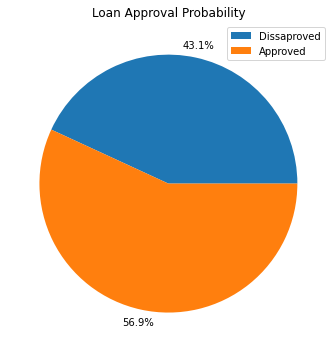

In [94]:
result()